### Regression Exercise 
# Moneyball The NBA
---

### This HW is not easy. TRY IT YOURSELF FIRST! 
Then If you are able to complete it, [watch this lecture series on it](https://ocw.mit.edu/courses/15-071-the-analytics-edge-spring-2017/pages/linear-regression/playing-moneyball-in-the-nba-recitation/video-1-the-data/). 

In [94]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse


from statsmodels.stats.outliers_influence import variance_inflation_factor


from statsmodels.api import qqplot

# Efficient counter for finding modes and frequency distributions
from collections import Counter

# import CTPLIB as ctp


# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

In [95]:
import os
print(os.getcwd())

/Users/akkeem/Documents/ClassAssignments/TTPR/Class-Exercises/ds-fall-2025-fri-0630/Week-08-Regression/exercise


# STEP 1 (i): Inspect and explore data
1. Use `data/NBA_test.csv and data/NBA_train.csv`

In [96]:

# READ IN THE DATA USING PANDAS 
df = pd.read_csv('../data/NBA_train.csv')


# DISPLAY THE FIRST 5 ROWS
df.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


```
SeasonEnd: Year season ended
Team: Name of team
Playoffs: If they made the playoffs. 1 == made to playoffs
W: Number of regular season in that season. 
PTS: Points scored in regular season. 
oppPTS: Opponent Points scored in regular season. 
FG: Field Goals made (total shots made == 2P and 3P combined)
FGA: Field Goals attempted (total shots attempted == 2P and 3P combined)
2P: two-pointers made
2PA: two-pointers attempted
3P: three-pointers made
3PA: three-pointers attempted
FT: Free-Throws made (not included in FG stat)
FTA: Free-Throws attempted (not included in FG stat)
ORB: Offensive Rebounds
DRB: Defensive Rebounds
AST: Assists made
STL: Steals 
BLK: Blocks 
TOV: Turnovers 
```

#### Inspect our data using `df.describe()` function.

In [97]:
# Inspect our data using `df.describe()` function.
df.describe()


,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,1996.319760,0.574850,41.000000,8370.239521,8370.239521,3200.367665,6873.318563,2881.324551,5956.444311,319.043114,916.874251,1650.461078,2189.953293,1061.584431,2427.354491,1912.112575,668.364072,419.805988,1302.837126
std,9.243808,0.494662,12.740822,581.040114,587.543959,287.181266,401.027166,446.097941,830.596327,199.698941,523.982964,197.651728,244.491086,150.224519,130.671523,221.610925,93.393044,82.274913,153.973470
min,1980.000000,0.000000,11.000000,6901.000000,6909.000000,2565.000000,5972.000000,1981.000000,4153.000000,10.000000,75.000000,1189.000000,1475.000000,639.000000,2044.000000,1423.000000,455.000000,204.000000,931.000000
25%,1989.000000,0.000000,31.000000,7934.000000,7934.000000,2974.000000,6563.500000,2510.000000,5269.000000,131.500000,413.000000,1502.500000,2008.000000,953.500000,2346.500000,1735.000000,599.000000,359.000000,1192.000000
50%,1996.000000,1.000000,42.000000,8312.000000,8365.000000,3150.000000,6831.000000,2718.000000,5706.000000,329.000000,942.000000,1628.000000,2176.000000,1055.000000,2433.000000,1899.000000,658.000000,410.000000,1289.000000
75%,2005.000000,1.000000,50.500000,8784.500000,8768.500000,3434.500000,7157.000000,3296.000000,6753.500000,481.500000,1347.500000,1781.000000,2352.000000,1167.000000,2516.500000,2077.500000,729.000000,469.500000,1395.500000
max,2011.000000,1.000000,72.000000,10371.000000,10723.000000,3980.000000,8868.000000,3954.000000,7873.000000,841.000000,2284.000000,2388.000000,3051.000000,1520.000000,2753.000000,2575.000000,1053.000000,716.000000,1873.000000


#### Check for Nulls.

In [98]:
# Check for Nulls.
df.isna().sum()

SeasonEnd    0
Team         0
Playoffs     0
W            0
PTS          0
oppPTS       0
FG           0
FGA          0
2P           0
2PA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
DRB          0
AST          0
STL          0
BLK          0
TOV          0
dtype: int64

#### Check for Duplicates

In [99]:
# Check for Duplicates
df.duplicated().sum()

np.int64(0)

#### Build a function that will INSPECT ANY DATAFRAME FOR YOU do this for you for any data frame you pass into it.

In [100]:
def inspect_dataframe(input_df, name="Dataset", verbosity="standard"):
    """
    Comprehensive Dataframe inspection function

    Parameters:
    -------------
    input_df: pandas.DataFrame
        The Dataframe we are currently inspecting
    name: string
        Name of the formal dataset (user input required)
    verbosity: string
        Level of detail: 'quick', 'standard', 'detailed'
    """
    # Header
    print("=" * 80)
    print(f'DATAFRAME INSPECTION REPORT: {name}')
    print("=" * 80)

    print(f"\n📊 BASIC INFORMATION")
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"Duplicate Rows: {df.duplicated().sum()} ({df.duplicated().sum()/len(df)*100:.2f}%)")

    print(f"\n📋 COLUMN INFORMATION")
    print("-"*80)

    for col in df.columns:
        dtype = str(df[col].dtype)
        non_null = df[col].notna().sum()
        null_pct = (df[col].isna().sum() / len(df)) * 100
        print(f"{col:<30} {dtype:<15} {non_null:<15} {null_pct:>6.2f}%")

    numeric_cols = df.select_dtypes(include=[np.number]).columns.to_list()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()
    datetime_cols = df.select_dtypes(include=['datetime64']).columns.to_list()

    print(f"\n🔢 Numeric Columns: {len(numeric_cols)} - {', '.join(numeric_cols)}") 
    print(f"🏷️  Categorical Columns: {len(categorical_cols)} - {', '.join(categorical_cols)}")
    print(f"📅 DateTime Columns: {len(datetime_cols)} - {', '.join(datetime_cols)}")

    if numeric_cols:
        print(f"\n📈 NUMERIC COLUMNS ANALYSIS")
        print("-" * 80)

        for col in numeric_cols:
            print(f"\n{col}:")
            data = df[col].dropna()

            if len(data) == 0:
                print(f" ⚠️ - All values in {col} are null")
                continue

            # Basic statistics
            print(f" Mean: {data.mean():.2f}")
            print(f" Median: {data.median():.2f}")
            print(f" Std Dev: {data.std():.2f}")
            print(f" Min: {data.min():.2f} | Max: {data.max():.2f}")
            print(f" Range: {data.max() - data.min():.2f}")

            # skewness = data.skew()
            # kurtosis = data.kurtosis()
    return "That gooood stuff."




#### Get a sense of how many wins it will take to make the playoffs. 
Make a scatter plot with x=Wins and the y=Team, and the hue=Playoffs

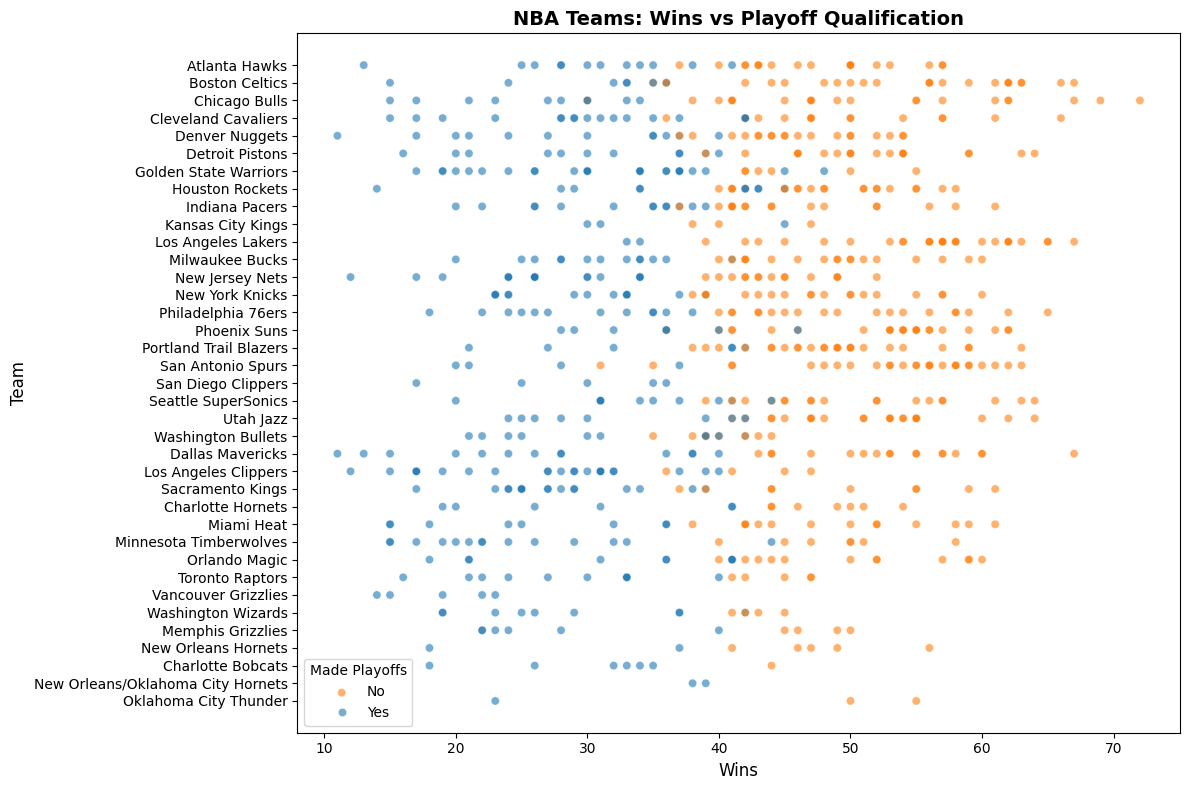

In [101]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=df, x='W', y='Team', hue='Playoffs', alpha=0.6)

plt.xlabel('Wins', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.title('NBA Teams: Wins vs Playoff Qualification', fontsize=14, fontweight='bold')
plt.legend(title='Made Playoffs', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

/var/folders/hs/684pm45n64vd1d5sgwfk5rk40000gn/T/ipykernel_12453/3116895491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Playoffs', y='W', palette=['red', 'green'])


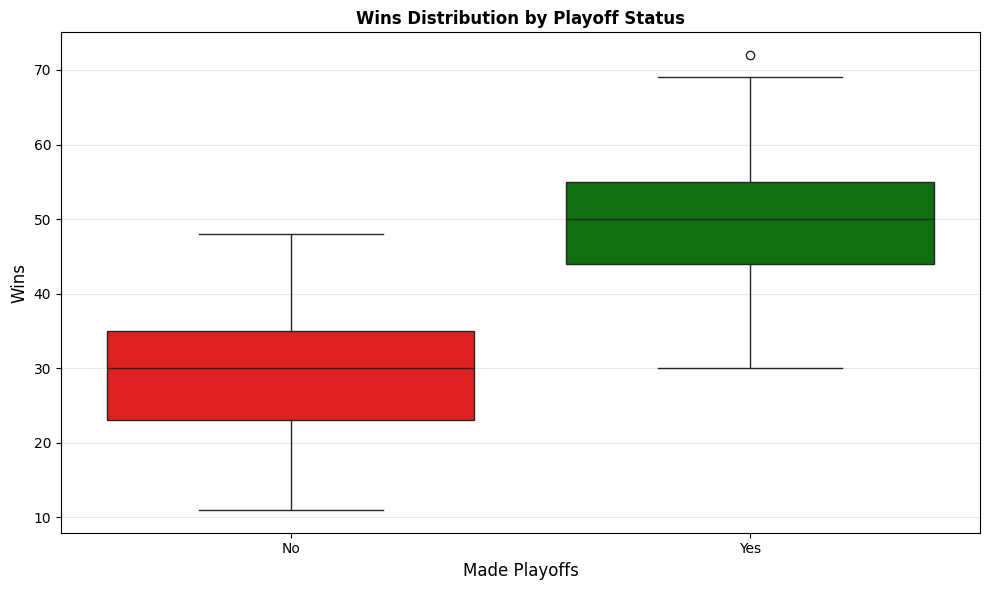

In [102]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df, x='Playoffs', y='W', palette=['red', 'green'])

plt.xlabel('Made Playoffs', fontsize=12)
plt.ylabel('Wins', fontsize=12)
plt.title('Wins Distribution by Playoff Status', fontsize=12, fontweight='bold')
plt.xticks([0,1], ['No', 'Yes'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#### Take a rough estimate, and now use that moving forward.  



In [103]:
# I'll make a rough estimate for the wins needed to make the playoffs (This is NOT a guarantee!!)
max_non_playoff = df[df['Playoffs'] == 0]['W'].max() # Max wins for teams that didn't make the playoffs
min_playoff = df[df['Playoffs'] == 1]['W'].min() # Min wins for teams that DID make the playoffs

print(f"Max wins for Non-Playoffs: {max_non_playoff}")
print(f"Min Wins for Playoff Teams: {min_playoff}")

WINS_NEED_TO_MAKE_PLAYOFFS = (max_non_playoff + min_playoff) / 2
print(f'Minimum wins needed to make playoffs: {WINS_NEED_TO_MAKE_PLAYOFFS:.0f}')

Max wins for Non-Playoffs: 48
Min Wins for Playoff Teams: 30
Minimum wins needed to make playoffs: 39


---

# Now do moneyball but for the NBA. 

#### I would like you to do try and do this on your own first.  

It's not easy, but its fun af.  

There is a guided lecture on how to do this that I can send you, but I'd like for you to try and figure it out on your own first.  

If you are fully stuck, ask in slack how other people did it if that doesn't work (I highly encourage collorbration and learning from eachother.  I still consider that doing it on your own.)  

If that doesn't work, DM me and I will send you the lectures explaining how to do the whole thing.

# Rough Guide a v1 model.
0. Make a model to predict PTS 
0. For v1, dont use `2P, 3P, FG, or FT`.  Instead use `2PA, 3PA, FTA`.  
0. Include any other cols use see fit.  


In [104]:
nba_analysis_df = df.copy()
print(f"Year range for the dataset: {nba_analysis_df['SeasonEnd'].min()} - {nba_analysis_df['SeasonEnd'].max()}")
print(f"Number of Unique Teams in the dataset: {nba_analysis_df['Team'].nunique()}")
print(f"These teams are: {sorted(nba_analysis_df['Team'].unique())}")
key_columns = ['2PA', '3PA', 'FTA']
missing_cols = nba_analysis_df[key_columns].isna().sum()
missing_cols = missing_cols[missing_cols > 0]
print(f"Key Columns missing data are: {missing_cols.index.tolist()}" if not missing_cols.empty else "There are no missing data in our Key Columns")



Year range for the dataset: 1980 - 2011
Number of Unique Teams in the dataset: 37
These teams are: ['Atlanta Hawks', 'Boston Celtics', 'Charlotte Bobcats', 'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers', 'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons', 'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers', 'Kansas City Kings', 'Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies', 'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves', 'New Jersey Nets', 'New Orleans Hornets', 'New Orleans/Oklahoma City Hornets', 'New York Knicks', 'Oklahoma City Thunder', 'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns', 'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs', 'San Diego Clippers', 'Seattle SuperSonics', 'Toronto Raptors', 'Utah Jazz', 'Vancouver Grizzlies', 'Washington Bullets', 'Washington Wizards']
There are no missing data in our Key Columns


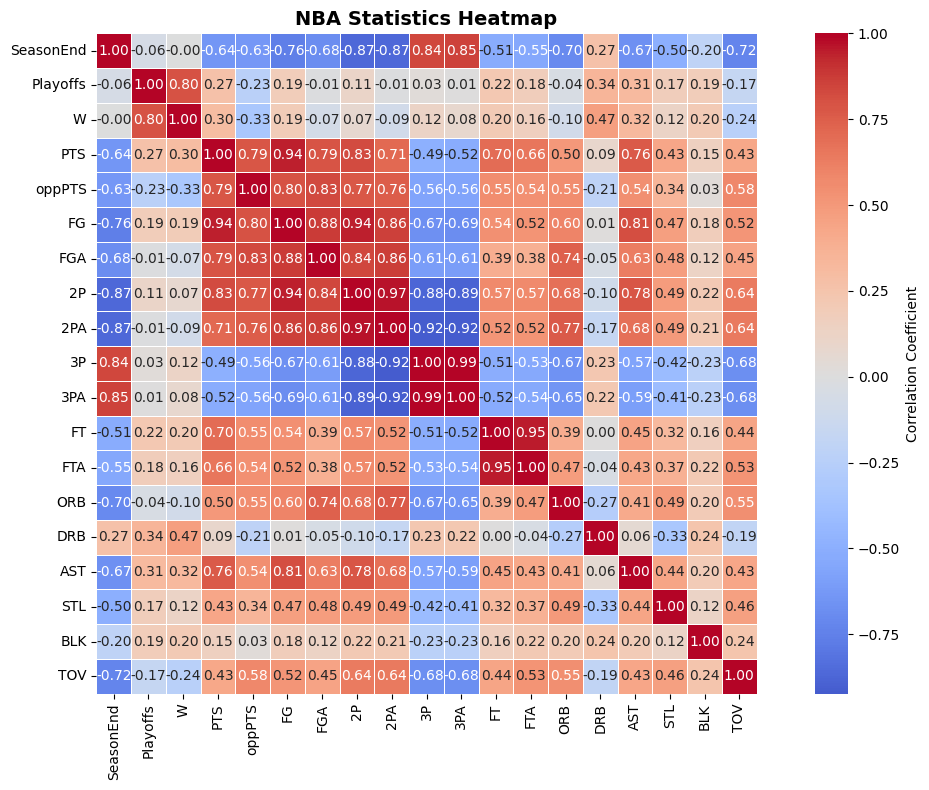

In [105]:
# We'll calculate correlation with PTS
numeric_cols = nba_analysis_df.select_dtypes(include=[np.number]).columns
pts_correlation = nba_analysis_df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(pts_correlation,
            annot=True, # We'll show each correlation value
            fmt='.2f',  # Format each value to 2 decimal places
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'}) 
plt.title('NBA Statistics Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [106]:
# We'll create our feature set with our independent variables
feature_cols = ['2PA', '3PA', 'FTA', 'AST', 'ORB', 'TOV']

X = nba_analysis_df[feature_cols] # Set the x-axis to independent variables
y = nba_analysis_df['PTS'] # Set the y-axis to what we're trying to predict

# Now we'll test for multicollinearity

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


  Feature         VIF
0     2PA  381.238664
1     3PA    5.990007
2     FTA  119.608174
3     AST  159.481672
4     ORB  145.061891
5     TOV  127.342091


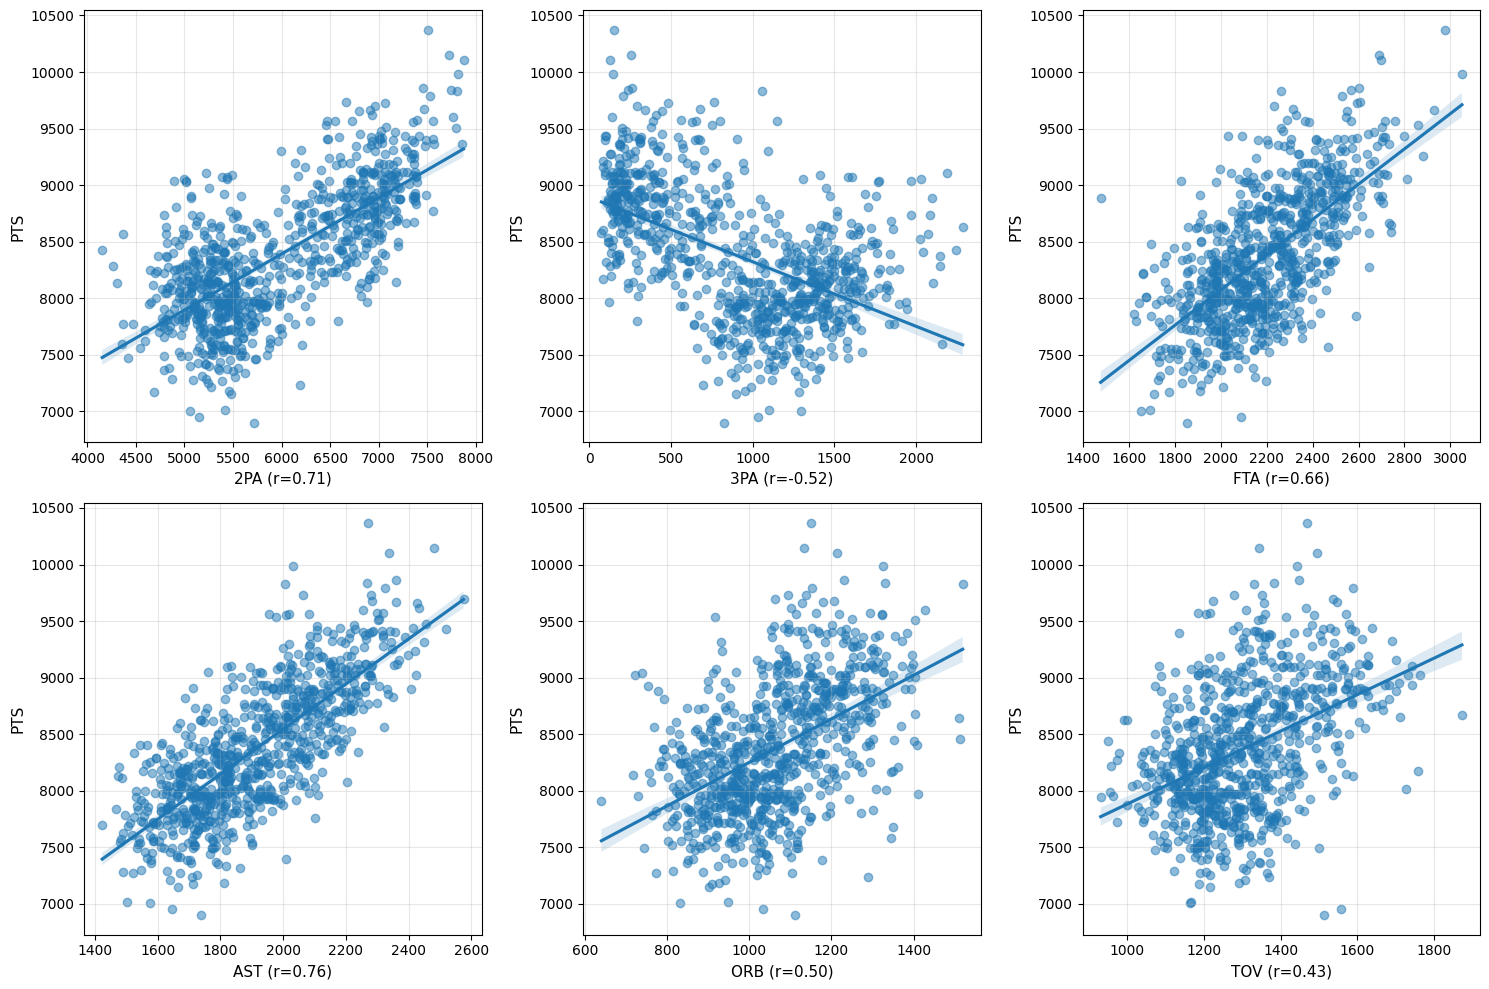

In [107]:
# Now we'll visualize the relationships between our key features and PTS
fig, axes = plt.subplots(2, 3, figsize=(15,10))

# Use 3 columns per row (2 rows x 3 cols)
for idx, feature in enumerate(feature_cols):
    row = idx // 3
    col = idx % 3

    ax = axes[row, col]

    sns.regplot(data=nba_analysis_df, x=feature, y='PTS', ax=ax, scatter_kws={'alpha':0.5})

    correlation = nba_analysis_df[[feature, 'PTS']].corr().iloc[0,1]
    ax.set_xlabel(f"{feature} (r={correlation:.2f})", fontsize=11)
    ax.set_ylabel('PTS', fontsize=11)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


### Correlation Analysis
We attempted to show the visualize the relationships between each feature and our graph is giving highly suspicious results.
- The correlation between each key feature and PTS is suspiciously low
- 3PA, a known feature with expected high positive correlation is demonstrating a negative correlation which raises red flags
- The variance of clusters particularly on 3PA is very spread apart which should not be the case

These results indicate a strong possibility of multicollinearity and therefore I will introduce further testing and refinement

In [ ]:
# SO quite a few of the features I selected are highly correlated
# Which kinda makes sense considering the rules of basketball
# so I'll follow the original instructions and limit to 2PA, 3PA, FTA

feature_cols = ['2PA', '3PA', 'FTA']

X = nba_analysis_df[feature_cols]

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training Set: {x_train.shape[0]} samples")
print(f"Testing set: {x_test.shape[0]}")

Training Set: 668 samples
Testing set: 167


In [109]:
# I'll create and train a model
nba_model = LinearRegression()
nba_model.fit(x_train, y_train)

# Quick evaluation
train_r2 = nba_model.score(x_train, y_train)
test_r2 = nba_model.score(x_test, y_test)
y_pred = nba_model.predict(x_test)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': nba_model.coef_
}).sort_values('Coefficient', ascending=False)

print("Model Coefficient:")
print(coefficients)

Model Coefficient:
  Feature  Coefficient
1     3PA     1.206332
2     FTA     1.113808
0     2PA     1.021241


### <center><underlined> Key Takeaways </underlined></center>

- 3PA has the highest coefficient because it provides the most points, more attempts result in a higher possiblity for more points scored.
- FTA has the second highest coefficient because it offers the safest and most reliable way of scoring points, more attempts mean an easier chance of landing points.
- 2PA are the standard way of scoring points so the correlation is positive but average.

In [110]:
# Lets do a more detailed statistical analysis

x_train_sm = sm.add_constant(x_train)
nba_model_sm = sm.OLS(y_train, x_train_sm).fit()
print(nba_model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     792.7
Date:                Sat, 01 Nov 2025   Prob (F-statistic):          6.46e-219
Time:                        02:20:22   Log-Likelihood:                -4685.2
No. Observations:                 668   AIC:                             9378.
Df Residuals:                     664   BIC:                             9397.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1258.4354    261.495     -4.812      0.0

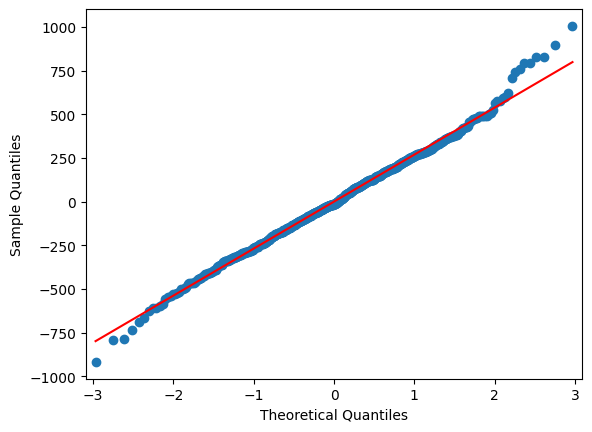

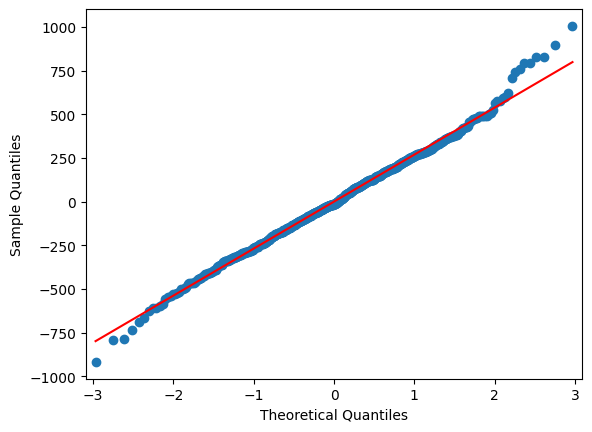

In [111]:
# Lets check our assumptions
residuals = nba_model_sm.resid
sm.qqplot(residuals, line='s')

In [112]:
# Lets do a comparison between sklearn and statsmodel predictions

# SKLEARN Predictions
y_train_pred_sklearn = nba_model.predict(x_train)
y_test_pred_sklearn = nba_model.predict(x_test)

# STATSMODEL Predictions
x_test_sm = sm.add_constant(x_test)
y_train_pred_sm = nba_model_sm.predict(x_train_sm)
y_test_pred_sm = nba_model_sm.predict(x_test_sm)

# Compare the predictions
print("="*60)
print("SKLEARN vs STATSMODELS Prediction Comparison")
print("="*60)

# SKLEARN RMSE
sklearn_train_rmse = rmse(y_train, y_train_pred_sklearn)
sklearn_test_rmse = rmse(y_test, y_test_pred_sklearn)

# STATSMODEL RMSE
sm_train_rmse = rmse(y_train, y_train_pred_sm)
sm_test_rmse = rmse(y_test, y_test_pred_sm)

print(f"\nTraining RMSE:")
print(f"  sklearn:      {sklearn_train_rmse:.2f} points")
print(f"  statsmodels:  {sm_train_rmse:.2f} points")
print(f"  Difference:   {abs(sklearn_train_rmse - sm_train_rmse):.4f} points")

print(f"\nTest RMSE:")
print(f"  sklearn:      {sklearn_test_rmse:.2f} points")
print(f"  statsmodels:  {sm_test_rmse:.2f} points")
print(f"  Difference:   {abs(sklearn_test_rmse - sm_test_rmse):.4f} points")

# Verify Predictions are identical
print(f"\n" + "=" * 60)
print("Prediction Verification")
print("=" * 60)
print(f"Max difference in test predictions: {np.max(np.abs(y_test_pred_sklearn - y_test_pred_sm)):.6f}")
print(f"Mean difference in test predictions: {np.mean(np.abs(y_test_pred_sklearn - y_test_pred_sm)):.6f}")

if np.allclose(y_train_pred_sklearn, y_train_pred_sm):
    print("✅ Predictions are identical! Both models agree.")
else:
    print("⚠️ Predictions differ slightly")

SKLEARN vs STATSMODELS Prediction Comparison

Training RMSE:
  sklearn:      269.05 points
  statsmodels:  269.05 points
  Difference:   0.0000 points

Test RMSE:
  sklearn:      250.16 points
  statsmodels:  250.16 points
  Difference:   0.0000 points

Prediction Verification
Max difference in test predictions: 0.000000
Mean difference in test predictions: 0.000000
✅ Predictions are identical! Both models agree.


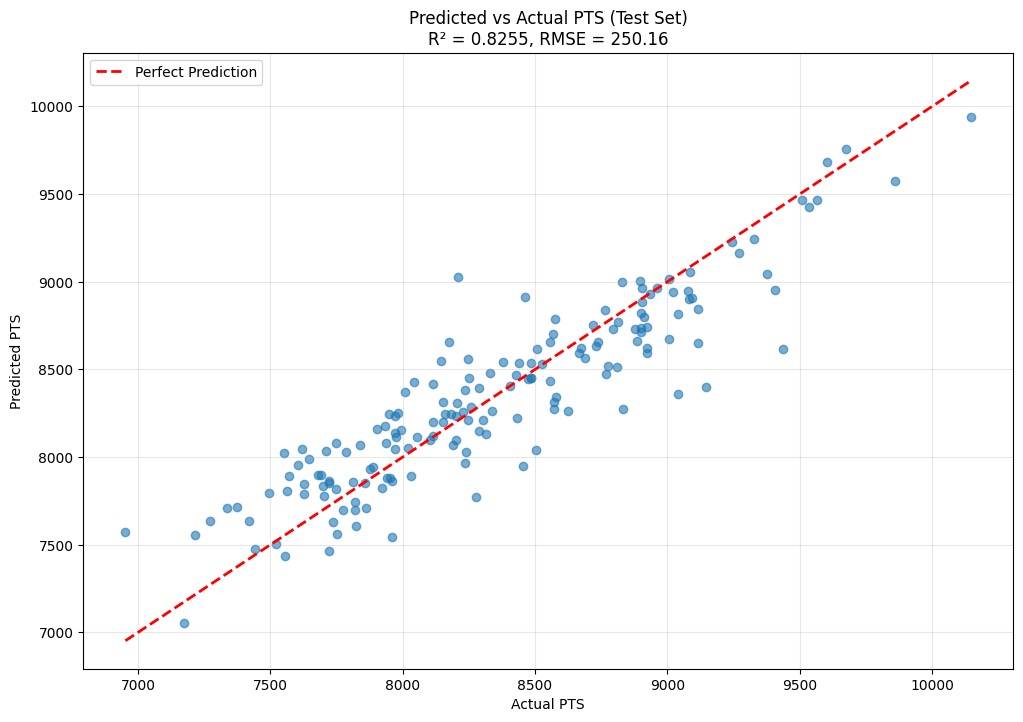

In [ ]:
# Assess Model Accuracy (Predicted vs Actual Values)
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_test_pred_sm, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual PTS')
plt.ylabel('Predicted PTS')
plt.title(f'Predicted vs Actual PTS (Test Set)\nR² = {test_r2:.4f}, RMSE = {test_rmse:.2f}')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## <center>Actual vs Predicted Interpretation</center>
- Tight clustering around the red (perfect) line indicates variance in this model's prediction, it does not predict perfectly but is accurate within a very good range (say accurate with a 3% margin of error)
- The even distribution of teams around the line, gives me decent confidence that the model has no systematic bais (it is not overfitting or underfitting).
- The even spread of values on the tail ends (lowest and highest points of the line) also makes me confident that the graph is homoscedastic

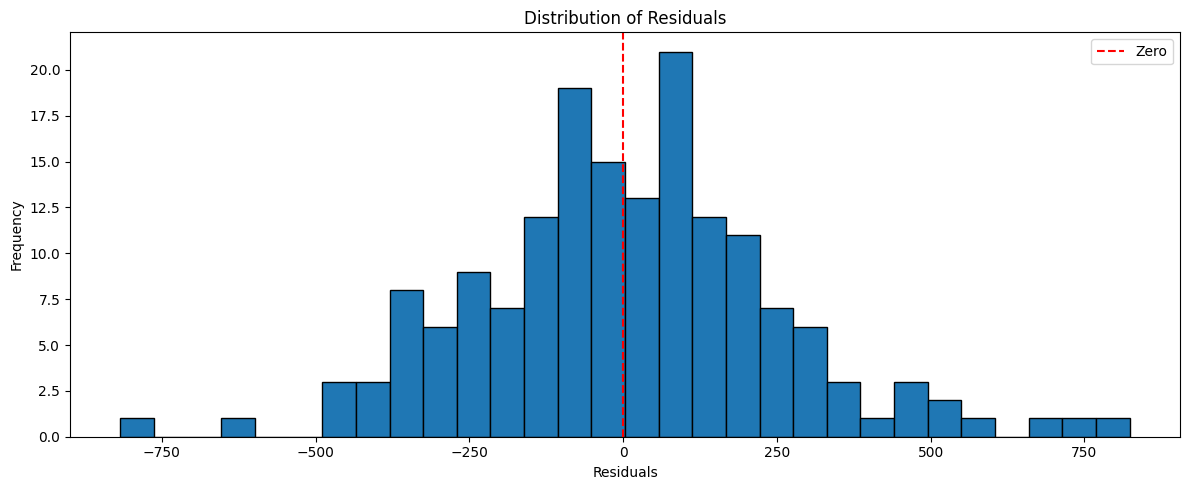

In [ ]:
# Calculate residuals
residuals = y_test - y_test_pred_sm

plt.figure(figsize=(12,5))

plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.axvline(0, color='red', linestyle='--', label='Zero')
plt.legend()

plt.tight_layout()
plt.show()

### <center>Residuals Analysis</center>
- The residual distribution is bell-shaped indicating a normal distribution, although not centered at zero, the peak is situated very close to that zero, indicating a very good predictive model with no systematic bias in predictions.
- Most predictions fall within ±250 value with a few outliers falling within the ±500 range.


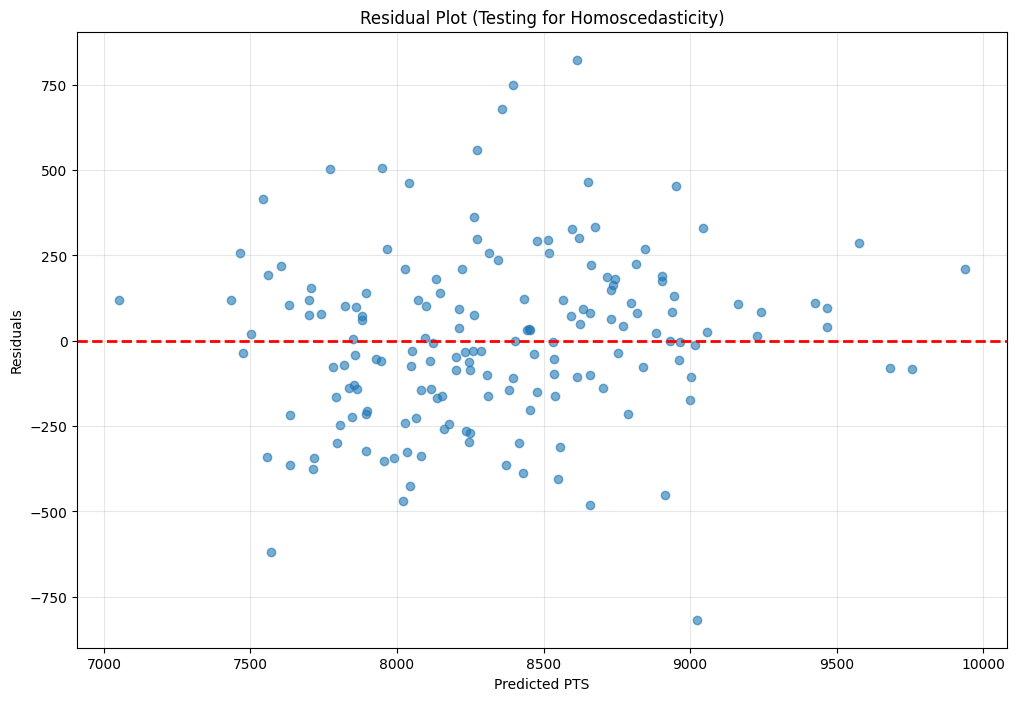

In [ ]:
# Checking Homoscedasticity

plt.figure(figsize=(12, 8))
plt.scatter(y_test_pred_sm, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted PTS')
plt.ylabel('Residuals')
plt.title('Residual Plot (Testing for Homoscedasticity)')
plt.grid(alpha=0.3)
plt.show()

### <center>Homoscedasticity Analysis</center>
- The random scatter around the Residual vs Predicted plot indicates that the variance does not change with predicted values (meaning this model's accuracy is consistent)
- The even distribution around the line, consistent scatter as well as lack of an observable pattern means my model's homoscedascity is intact.
- This further verifies that there are no sytematic biases as the residuals are evenly distributed around the red line

# Model Performance Summary & Conclusions

## Final Results
- **R² = 0.782**: Model can explain 78.2% of variance in points scored
- **RMSE = 250points**: ~3% prediction error (so about 3pts per game)
- **No overfitting**: Test RMSE (250) < Train RMSE (269)

## Key Findings
1. **All features are significant** (p <0.001)
    - 3PA (coeff=1.21): This is the most valuable per attempt
    - FTA (coef=1.11): High-percentage opportunities
    - 2PA (coef=1.02): Standard scoring method

2. **Assumptions validated**:
   - ✅ Linearity (regression plots show linear relationships)
   - ✅ Normality (QQ plot, residual histogram near-normal)
   - ✅ Homoscedasticity (residual vs fitted shows constant variance)
   - ✅ Independence (Durbin-Watson = 2.04)

3. **Model consistency**: sklearn and statsmodels produce identical predictions

## Limitations
- High condition number (1.62e+05) indicates multicollinearity among shot attempts
- Slight deviation from perfect normality (acceptable with n=668)
- Model uses only offensive statistics (could add defensive features)

## Next Steps (I'd like to consider)
1. Consider time-period effects (1980 vs 2010) and conference effects (Eastern vs Western)
2. Design custom features and model those features against points and wins